# Análise de Computadores para Inclusão no Brasil.

Link para os Dados do Governo Federal: https://www.gov.br/mcom/pt-br/acesso-a-informacao/acoes-e-programas/computadores-para-inclusao

# Importar bibliotecas.

In [ ]:
#Importar bibliotecas necessárias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

'''Machine Learning'''
from sklearn import tree
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn import tree
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
#!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
!pip install wordcloud -q
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score

# Coleta de dados.

#### Dados foram unificados com o Knime.

Limpeza dos dados na base.

Colunas foram removidas com o objetivo de iniciar uma limpeza geral da base.

In [ ]:
# DataFrame

inclusao = pd.read_csv(r'/content/crc.csv', sep=';', encoding='UTF-8', nrows = 100000, error_bad_lines=False, engine='python')

# Visualização do Dataframe.

In [ ]:
# Inicio do Dataset.

inclusao.head(10)

,ANO,Região,UF,CPU,NOTE,MONITOR,IMPRESS,SEXO,CURSO_JOV,CATEGORIA,CARGA_HORAS
0,2018,Sudeste,SP,14.0,0.0,5.0,8.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
1,2018,Centro-Oeste,MS,25.0,2.0,1.0,6.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
2,2018,Sudeste,SP,10.0,4.0,5.0,8.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
3,2018,Centro-Oeste,DF,36.0,11.0,80.0,3.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
4,2018,Centro-Oeste,DF,36.0,11.0,80.0,3.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
5,2018,Centro-Oeste,DF,0.0,0.0,0.0,0.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
6,2018,Centro-Oeste,DF,30.0,2.0,39.0,0.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
7,2018,Norte,AC,1.0,1.0,4.0,4.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
8,2018,Sudeste,RJ,0.0,0.0,5.0,1.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
9,2018,Centro-Oeste,DF,38.0,35.0,79.0,1.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0


In [ ]:
# Final do Dataset.

inclusao.tail(10)

,ANO,Região,UF,CPU,NOTE,MONITOR,IMPRESS,SEXO,CURSO_JOV,CATEGORIA,CARGA_HORAS
12170,2017,Nordeste,PE,8.0,4.0,16.0,10.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
12171,2017,Nordeste,PE,1.0,0.0,0.0,4.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
12172,2017,Nordeste,AL,33.0,11.0,9.0,0.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
12173,2017,Nordeste,AL,7.0,0.0,8.0,2.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
12174,2017,Norte,PA,26.0,4.0,8.0,28.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
12175,2017,Norte,AP,0.0,0.0,0.0,0.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
12176,2017,Norte,AC,23.0,3.0,11.0,12.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
12177,2017,Centro-Oeste,DF,325.0,128.0,221.0,65.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
12178,2017,Centro-Oeste,DF,6.0,0.0,2.0,7.0,MAS,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0
12179,201,None,None,NaN,NaN,NaN,NaN,None,None,None,NaN


# Preparação dos dados.

Apresentado a análise dos dados do dataset, que embasará a conclusão do estudo.

In [ ]:
# Organização das colunas.

colunas = ['ANO', 'Região', 'UF', 'CPU', 'NOTE', 'MONITOR', 'IMPRESS', 'CURSO_JOV', 'CATEGORIA', 'CARGA_HORAS', 'SEXO']
inclusao = inclusao[colunas]

In [ ]:
inclusao = inclusao.rename(columns = {'Região': 'REGIAO'})

In [ ]:
inclusao.head(5)

,ANO,REGIAO,UF,CPU,NOTE,MONITOR,IMPRESS,CURSO_JOV,CATEGORIA,CARGA_HORAS,SEXO
0,2018,Sudeste,SP,14.0,0.0,5.0,8.0,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0,MAS
1,2018,Centro-Oeste,MS,25.0,2.0,1.0,6.0,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0,MAS
2,2018,Sudeste,SP,10.0,4.0,5.0,8.0,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0,MAS
3,2018,Centro-Oeste,DF,36.0,11.0,80.0,3.0,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0,MAS
4,2018,Centro-Oeste,DF,36.0,11.0,80.0,3.0,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0,MAS


## Algum atributo possue valores ausentes.

In [ ]:
#Verificando valores ausentes do df (isnull().sum()).

(inclusao.isnull().sum()/inclusao.shape[0]).sort_values(ascending=False)

MONITOR        0.000903
NOTE           0.000657
IMPRESS        0.000328
REGIAO         0.000082
UF             0.000082
CPU            0.000082
CURSO_JOV      0.000082
CATEGORIA      0.000082
CARGA_HORAS    0.000082
SEXO           0.000082
ANO            0.000000
dtype: float64

In [ ]:
#Excluindo valores ausentes ('dropna').

inclusao.dropna(inplace=True)

In [ ]:
#Verificando valores ausentes do df (isnull().sum()).

(inclusao.isnull().sum()/inclusao.shape[0]).sort_values(ascending=False)

ANO            0.0
REGIAO         0.0
UF             0.0
CPU            0.0
NOTE           0.0
MONITOR        0.0
IMPRESS        0.0
CURSO_JOV      0.0
CATEGORIA      0.0
CARGA_HORAS    0.0
SEXO           0.0
dtype: float64

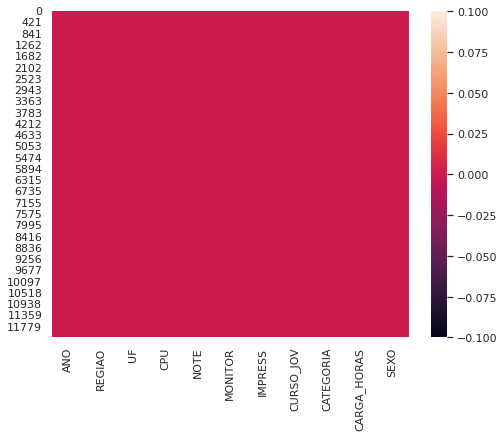

In [ ]:
# Represetanção Gráfica sem valores NAN ou Nulos.

plt.figure(figsize=(8,6));
sns.heatmap(inclusao.isnull());

### Agora os atributos não tem mais valores ausentes.

# AED - Análise exploratória dos Dados dos Centros de Recondicionamento de Computadores - CRCs.

In [ ]:
# Mostrar os Estados contemplados.

print(f'Os Estados contemplados são: {inclusao.UF.unique()}')

Os Estados contemplados são: ['SP' 'MS' 'DF' 'AC' 'RJ' 'CE' 'RS' 'BA' 'PR' 'RN' 'MG' 'PA' 'SE' 'SC'
 'GO' 'MA' 'TO' 'PE' 'PI' 'ES' 'PB' 'RO' 'MT' 'AL' 'AM' 'AP' 'RR']


In [ ]:
# Total de Estados Contemplados.

print(f'Ao total foram: {len(inclusao.UF.unique())} Estados Contemplados')

Ao total foram: 27 Estados Contemplados


# Quais Estados foram Agrupados.

In [ ]:
# Os Estados foram agrupados.

inclusao.groupby('UF')[['CPU', 'NOTE', 'MONITOR', 'IMPRESS']].max().sort_values(by=['CPU', 'NOTE', 'MONITOR', 'IMPRESS'], ascending = False)[:20]

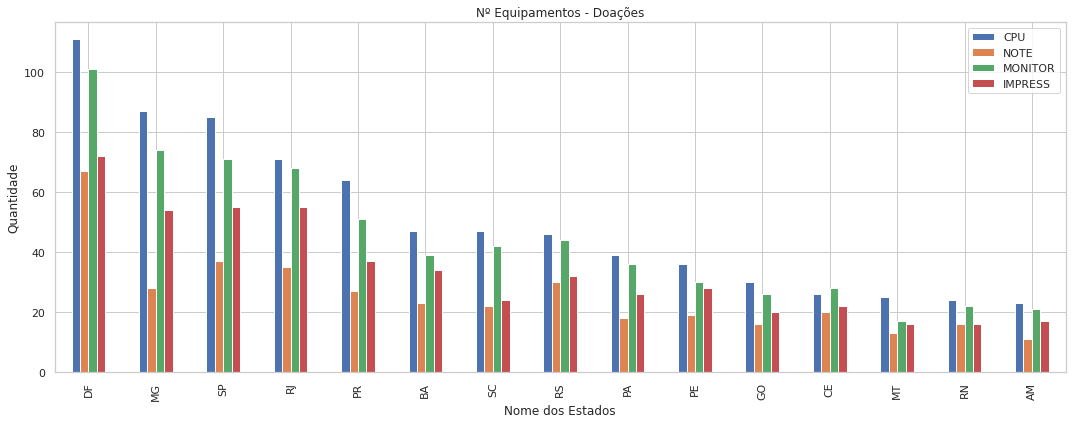

In [ ]:
# Gráfico de barra dos Equipamentos por Estados.

casos = (inclusao.groupby('UF')[['CPU', 'NOTE', 'MONITOR', 'IMPRESS']].nunique().sort_values(by=['CPU', 'NOTE', 'MONITOR', 'IMPRESS'], ascending = False))[:15]
fig, ax = plt.subplots(figsize=(15,6))

casos.plot(kind='bar', ax=ax)
ax.set_title('Nº Equipamentos - Doações')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Nome dos Estados')
plt.tight_layout()

### O Distrito Federal aparece com maior contemplação no Brasil, em seguida está o estado de Minas Gerais e em terceiro o estado de São Paulo.

### O Estado de Amazônas tem o menor recebimento de equipamentos.

# Evolução das Doações.

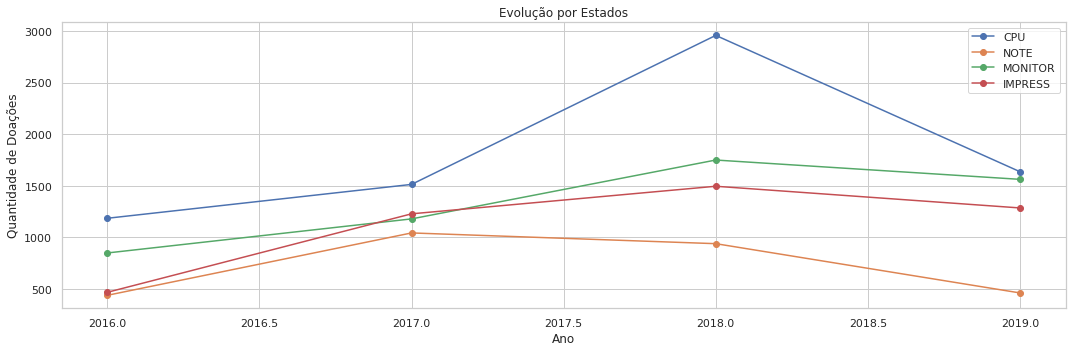

In [ ]:
# Evolução das doações por Estados.

evoluçao = inclusao.groupby('ANO')[['CPU', 'NOTE', 'MONITOR', 'IMPRESS']].max()

fig, ax = plt.subplots(figsize = (15,5))

evoluçao.plot(kind='line', marker='o', ax=ax)
ax.set_title('Evolução por Estados')
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de Doações')
plt.tight_layout()

### É possivel observar que nos anos de 2016 a 2019, houve um crescimento de doações.

### Porém, o numero de "Notes", veio sofrendo uma queda de 2017 até 2019.

In [ ]:
# Extraindo informações do Distrito Federal - DF.

capital = inclusao.loc[inclusao['UF'] == 'DF']

capital.head() 

,ANO,REGIAO,UF,CPU,NOTE,MONITOR,IMPRESS,CURSO_JOV,CATEGORIA,CARGA_HORAS,SEXO
3,2018,Centro-Oeste,DF,36.0,11.0,80.0,3.0,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0,MAS
4,2018,Centro-Oeste,DF,36.0,11.0,80.0,3.0,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0,MAS
5,2018,Centro-Oeste,DF,0.0,0.0,0.0,0.0,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0,MAS
6,2018,Centro-Oeste,DF,30.0,2.0,39.0,0.0,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0,MAS
9,2018,Centro-Oeste,DF,38.0,35.0,79.0,1.0,INF. BÁSICA - MONTAGEM E MANUTENÇÃO DE COMP. -...,MANUTENÇÃO E RECONDICIONAMENTO,70.0,MAS


# Analisando do Distrito Federal.

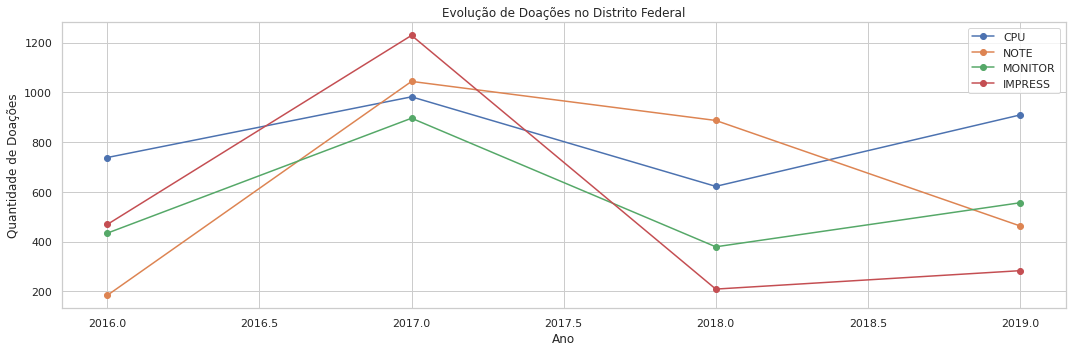

In [ ]:
# Gráfico de linhas para visualizar a evolução de doações no Distrito Federal - DF.

capital = capital.groupby('ANO')[['CPU', 'NOTE', 'MONITOR', 'IMPRESS']].max()

fig, ax = plt.subplots(figsize = (15,5))

capital.plot(kind='line', marker='o', ax=ax)
ax.set_title('Evolução de Doações no Distrito Federal') 
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de Doações')
plt.tight_layout()

### Observamos que o Distrito Febderal é o que tem uma evolução maior em doações. Por isso, vamos agora visualizar melhor a evolução da Capital do Brasil.

# Analisando os dados de Regiões do Brasil.

In [ ]:
# As regiões que mais foram Contemplados.

inclusao.groupby('REGIAO')[['CPU', 'NOTE', 'MONITOR', 'IMPRESS']].max().sort_values(by=['CPU', 'NOTE', 'MONITOR', 'IMPRESS'], ascending = False)[:20]

,CPU,NOTE,MONITOR,IMPRESS
REGIAO,,,,
Sudeste,2957.0,940.0,1750.0,1496.0
Centro-Oeste,1514.0,1044.0,1180.0,1229.0
Nordeste,1403.0,261.0,804.0,890.0
Norte,711.0,183.0,870.0,304.0
Sul,507.0,785.0,427.0,228.0


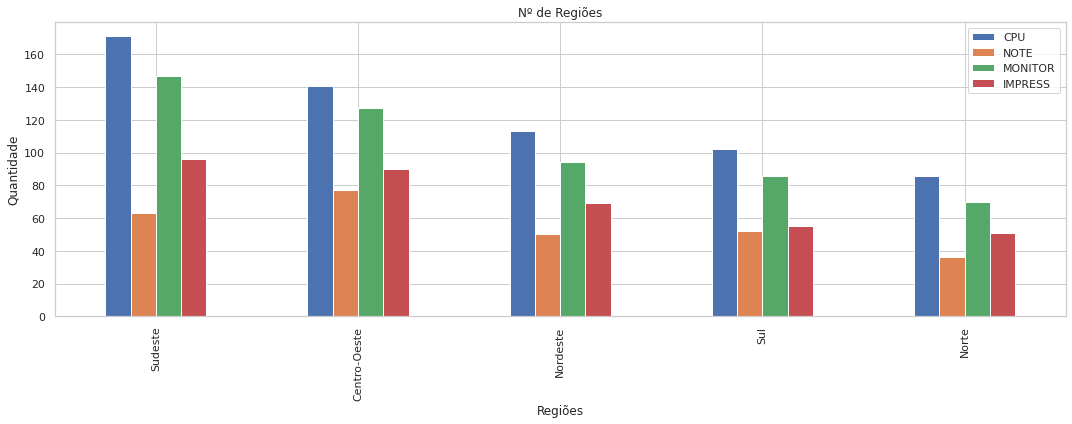

In [ ]:
# Gráfico de barra por Regiões.

regiao = (inclusao.groupby('REGIAO')[['CPU', 'NOTE', 'MONITOR', 'IMPRESS']].nunique().sort_values(by=['CPU', 'NOTE', 'MONITOR', 'IMPRESS'], ascending = False))[:15]
fig, ax = plt.subplots(figsize=(15,6))

regiao.plot(kind='bar', ax=ax)
ax.set_title('Nº de Regiões')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Regiões')
plt.tight_layout()

### O gráfico mostra que a Região Sudeste é a Centro-Oeste são as mais contemplada com as doações, e a Região Norte é a que recebe menos.

# Análise de Frequencia de Sexo.

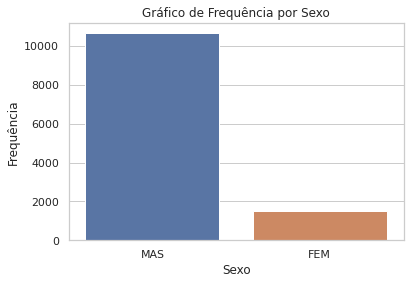

In [ ]:
# sexo.

sns.countplot(inclusao.SEXO)
plt.title("Gráfico de Frequência por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Frequência")
plt.show()

#### O Gráfico mostra que a representação Masculina é maior que a Feminina nos cursos.

# Preparação dos modelos de Machine Learning

Será utilizada a documentação da biblioteca Scikitlearn https://scikit-learn.org/stable/tutorial/machine_learning_map/, observamos que trata-se de um problema de classificação, portanto, utilizamos os algoritmos recomendados pela biblioteca.

### Criando as Variáveis 

In [ ]:
# A coluna alvo será a de SEXO.

X = inclusao.iloc[:,3:8].values #teste usando só as colunas CPU	NOTE	MONITOR	IMPRESS e CURSO_JOV	
y = inclusao.iloc[:, -1].values

### Preparação dos Dados

In [ ]:
from sklearn.compose import ColumnTransformer # transformadores a colunas de uma matriz ou pandas DataFrame.
from sklearn.preprocessing import OneHotEncoder # necessária para alimentar dados categóricos
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 14.0 0.0 5.0 8.0]
 [1.0 25.0 2.0 1.0 6.0]
 [1.0 10.0 4.0 5.0 8.0]
 ...
 [1.0 23.0 3.0 11.0 12.0]
 [1.0 325.0 128.0 221.0 65.0]
 [1.0 6.0 0.0 2.0 7.0]]


### Separando em Treino e Teste

In [ ]:
## Preparar para Treino e Teste.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Padroniza recursos removendo a média e dimensionando para a variação da unidade.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Criando um Modelo de Naive-Bayes

#### Treinando o modelo Naive Bayes no conjunto de treinamento

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

#### Prevendo os resultados do conjunto de testes

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['MAS' 'MAS']
 ['MAS' 'MAS']
 ['MAS' 'MAS']
 ...
 ['MAS' 'MAS']
 ['MAS' 'FEM']
 ['MAS' 'MAS']]


#### Fazendo a Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  20  367]
 [  98 2555]]


0.8470394736842105

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         FEM       0.17      0.05      0.08       387
         MAS       0.87      0.96      0.92      2653

    accuracy                           0.85      3040
   macro avg       0.52      0.51      0.50      3040
weighted avg       0.78      0.85      0.81      3040



### Plotando a Matriz de Confusão

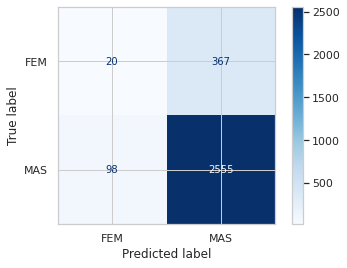

In [ ]:
score = classifier.score(X_test,y_test)
matriz = plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues', values_format = 'd')

## Criando um Modelo SVM

### Treinando o modelo SVM no conjunto de treinamento

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Prevendo os resultados do conjunto de testes.

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['MAS' 'MAS']
 ['MAS' 'MAS']
 ['MAS' 'MAS']
 ...
 ['MAS' 'MAS']
 ['MAS' 'FEM']
 ['MAS' 'MAS']]


### Fazendo a Matriz de Confusão.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[   0  387]
 [   0 2653]]


0.8726973684210526

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         FEM       0.00      0.00      0.00       387
         MAS       0.87      1.00      0.93      2653

    accuracy                           0.87      3040
   macro avg       0.44      0.50      0.47      3040
weighted avg       0.76      0.87      0.81      3040



### Plotando a Matriz de Confusão

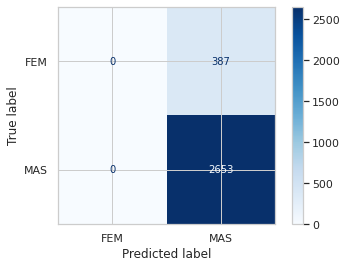

In [ ]:
score = classifier.score(X_test,y_test)
matriz = plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues', values_format = 'd')

## Criando um Modelo Decision Tree

### Treinando o Modelo no Conjunto de Treino

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Prevendo os resultados do conjunto de testes

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['MAS' 'MAS']
 ['MAS' 'MAS']
 ['MAS' 'MAS']
 ...
 ['MAS' 'MAS']
 ['MAS' 'FEM']
 ['MAS' 'MAS']]


### Fazendo a Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  23  364]
 [  97 2556]]


0.8483552631578948

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         FEM       0.19      0.06      0.09       387
         MAS       0.88      0.96      0.92      2653

    accuracy                           0.85      3040
   macro avg       0.53      0.51      0.50      3040
weighted avg       0.79      0.85      0.81      3040



### Plotando a Matriz de Confusão

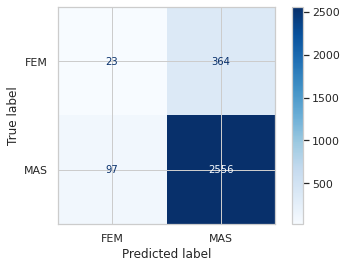

In [ ]:
score = classifier.score(X_test,y_test)
matriz = plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues', values_format = 'd')

## Criando um Modelo Random Forest

### Treinando o modelo no conjunto de treinamento

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Prevendo os resultados do conjunto de testes

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['MAS' 'MAS']
 ['MAS' 'MAS']
 ['MAS' 'MAS']
 ...
 ['MAS' 'MAS']
 ['MAS' 'FEM']
 ['MAS' 'MAS']]


### Fazendo a Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  16  371]
 [  72 2581]]


0.8542763157894737

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         FEM       0.18      0.04      0.07       387
         MAS       0.87      0.97      0.92      2653

    accuracy                           0.85      3040
   macro avg       0.53      0.51      0.49      3040
weighted avg       0.79      0.85      0.81      3040



### Plotando a Matriz de Confusão

In [ ]:
score = classifier.score(X_test,y_test)

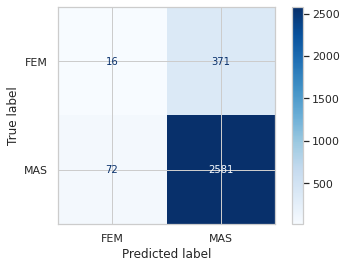

In [ ]:
matriz = plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues', values_format = 'd')

# Conclusão dos Resultados

## Os algoritmos utilizados tiveram uma boa performance, ficaram relativamente com a mesma com variação de acurácia que foi entre 0.85 e 0.87, em quase todos os algortimos. Uma boa peformance para ser usado em um projeto.